### Metrics TR-MSE

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tnrange, tqdm_notebook
from utils import nn_verification, tr_mse, tr_mse_nn_output, load_p2p_models
from models import g_unet, discriminator

Using TensorFlow backend.


In [2]:
models_path = 'trained_models/sand'
trend_num = 4
nn_name = 'nf8_cb'
W = 256
H = 256
nf = 8
AA = 3
l_0 = 0.4
l_1 = 1.4

In [3]:
f_gen = g_unet(nf)
d = discriminator(nf)
f_gen, _, _ = load_p2p_models(models_path, trend_num, nn_name, f_gen, d)

In [4]:
K = (l_1 - l_0) / (W * AA)
def l0(x):
    return l_0

def l1(x):
    return l_1

def l_trend(x):
    return l_0 + K * x

In [5]:
nn_verification(models_path, trend_num, nn_name, f_gen, 5, W, H, l0, l1, l_trend)

Verification:   0%|          | 0/5 [00:00<?, ?it/s]

Dir already exist


Verification: 100%|██████████| 5/5 [01:20<00:00, 16.00s/it]

NN output saved successfully.


In [3]:
verification_path = models_path + '/trend' + str(trend_num) + '/' + nn_name + '/verification'
nn_mse, nn_err, nn_tr, tr_side1, tr_side2, tr_pan  = tr_mse_nn_output(verification_path, 3)

NN output: 100%|██████████| 5/5 [00:00<00:00,  5.27it/s]

Dir already exist
Metrics saved successfully.


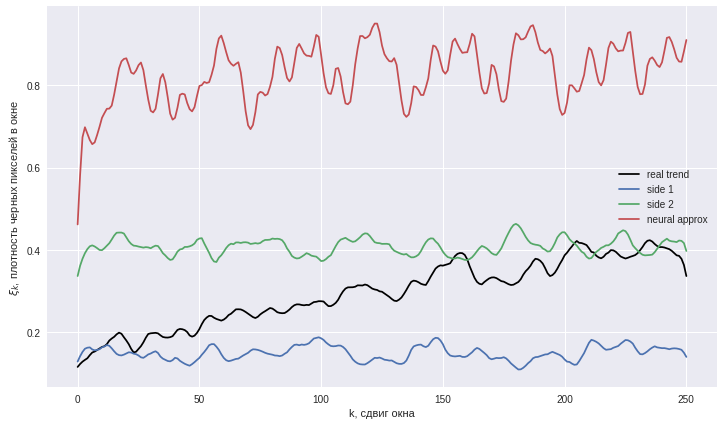

In [4]:
plt.figure(figsize=(12, 7))
plt.plot(tr_pan, label='real trend', color='black')
plt.plot(tr_side1, label='side 1')
plt.plot(tr_side2, label='side 2')
plt.plot(nn_tr, label='neural approx')
plt.xlabel('k, сдвиг окна')
plt.ylabel(r'$\xi_k$, плотность черных пикселей в окне')
plt.legend()
plt.savefig(verification_path + '/tr_1.png')